En el presente notebook se muestran de manera gráfica el historial de entrenamiento del chatbot seleccionado en el capítulo 6.2.1. Para ello, se entrenaron los modelos inicialmente con 50 épocas, utilizando una tasa de aprendizaje de 2 que disminuía con el tiempo y el optimizador Adam. Luego de ello, al analizar dichos resultados obtenidos, se entrenaron los modelos por 100 épocas y usando el optimizador Adam y Stochastic Gradient Descend, con una tasa de aprendizaje constante de 0.01. Todos los expeirmentos se realizaron con dropout de 20% y un conjunto de validación del 20% del conjunto total de entrenamiento.

# Importaciones de Librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.processing.constants import BASE_DIRECTORY
from typing import List

%matplotlib inline

# Funciones de ayuda

In [2]:
def get_epoch_from_line(line: str) -> int:
    '''
    This function gets an epoch from a line of the text.
    
    Parameters:
    line(str): The line of the text.
    
    Returns:
    int: The epoch.
    '''
    return int(line.split()[1].split('/')[0])

In [3]:
def get_training_loss_from_line(line: str) -> float:
    '''
    This function gets the training loss from a line.
    
    Parameters:
    line(str): The line of the text.
    
    Returns:
    float: The training loss.
    '''
    words = line.split()
    training_loss_str = words[11]
    return float(training_loss_str[:-1])

In [4]:
def get_validation_loss_from_line(line: str) -> float:
    '''
    This function gets the validation loss from a line.
    
    Parameters:
    line(str): The line of the text.
    
    Returns:
    float: The validation loss.
    '''
    words = line.split()
    validation_loss_str = words[4]
    return float(validation_loss_str[:-1])

In [5]:
def get_training_validation_perplexity(filename: str, epochs: int) -> (List, List):
    '''
    This function obtains, from a text file, the validation and training perplexity.
    
    Parameters:
    filename(str): The file where the training log of the chatbot is found.
    epochs(str): The amount of epochs that were used to train the chatbot.
    
    Returns:
    List, List: A list with the training loss and another with the validaton perplexity.
    '''
    training_loss = np.zeros(epochs)
    validation_loss = np.zeros(epochs)
    with open(filename, 'r') as f: # Open the file with the training data
        # Iterate every line
        for line in f:
            if 'Training Loss:' in line: # Get training loss
                epoch = get_epoch_from_line(line) # Get epoch
                training_loss[epoch - 1] = get_training_loss_from_line(line) # Store loss in list
            elif 'Validation loss:' in line: # Get validation loss
                epoch = get_epoch_from_line(line) # Get epoch)
                validation_loss[epoch - 1] = get_validation_loss_from_line(line) # Store loss in list
    
    return pd.DataFrame(data={
    'training': np.exp(training_loss),
    'validation': np.exp(validation_loss)
    })   

# Resultados del entrenamiento del chatbot con textos de complejidad textual 1

## Entrenamiento por 50 épocas

### Obteniendo los datos

In [6]:
losses = get_training_validation_perplexity(f'{BASE_DIRECTORY}/data/raw/log_grade_1_50_epochs.txt', 50)


### Curva de error en entrenamiento y validación

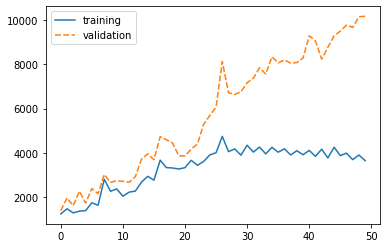

In [7]:
sns.lineplot(data=losses)
plt.show()

## Entrenamiento por 100 épocas

### Optimizador SGD

#### Obteniendo los datos

In [10]:
losses = get_training_validation_perplexity(f'{BASE_DIRECTORY}/data/raw/log_grade_1_100_epochs_sgd.txt', 100)

#### Curva de error en entrenamiento y validación

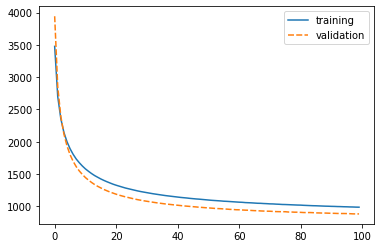

In [11]:
sns.lineplot(data=losses)
plt.show()

### Optimizador Adam

#### Obteniendo los datos

In [12]:
losses = get_training_validation_perplexity(f'{BASE_DIRECTORY}/data/raw/log_grade_1_100_epochs_adam.txt', 100)

#### Curva de error en entrenamiento y validación

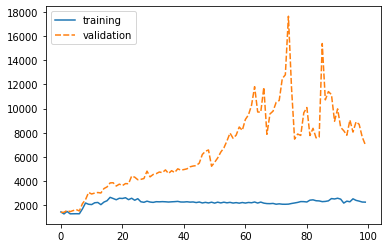

In [13]:
sns.lineplot(data=losses)
plt.show()

# Resultados del entrenamiento del chatbot con textos de complejidad textual 2

## Entrenamiento por 50 épocas

### Obteniendo los datos

In [14]:
losses = get_training_validation_perplexity(f'{BASE_DIRECTORY}/data/raw/log_grade_2_50_epochs.txt', 50)

### Curva de error en entrenamiento y validación

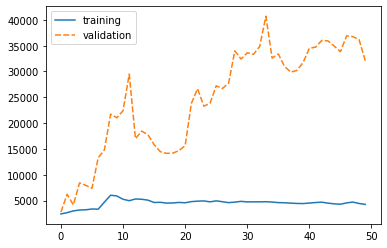

In [15]:
sns.lineplot(data=losses)
plt.show()

## Entrenamiento por 100 épocas

### Optimizador SGD

#### Obteniendo los datos

In [16]:
losses = get_training_validation_perplexity(f'{BASE_DIRECTORY}/data/raw/log_grade_2_100_epochs_sgd.txt', 100)

#### Curva de error en entrenamiento y validación

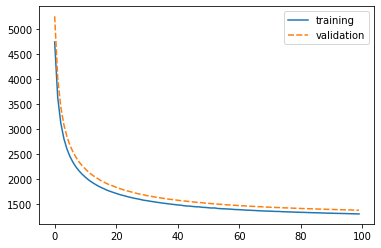

In [17]:
sns.lineplot(data=losses)
plt.show()

### Optimizador Adam

#### Obteniendo los datos

In [18]:
losses = get_training_validation_perplexity(f'{BASE_DIRECTORY}/data/raw/log_grade_2_100_epochs_adam.txt', 100)

#### Curva de error en entrenamiento y validación

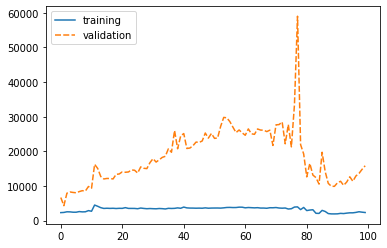

In [19]:
sns.lineplot(data=losses)
plt.show()